In [121]:
from plyfile import PlyData
import seaborn as sns
import pandas as pd
import numpy as np
import torch
from torchvision import transforms 

In [127]:
ply = PlyData.read("pointcloud.ply")
pc_array = np.zeros((4,192,256))
depth_array = np.zeros((1,192,256))

plydata = PlyData.read('pointcloud.ply')
ply_test = pd.DataFrame({key_: plydata['vertex'][key_] for key_ in ['x', 'y', 'z', 'red', 'green', 'blue', 'cx', 'cy', 'depth', 'alpha']})
ply_test

,x,y,z,red,green,blue,cx,cy,depth,alpha
0,3.712441,-0.379664,-1.017501,0,0,0,0.0,0.0,3.388672,255
1,3.721317,-0.378725,-1.019537,0,0,0,0.0,1.0,3.396484,255
2,3.752594,-0.370215,-1.026797,0,0,0,0.0,2.0,3.423828,255
3,3.842113,-0.342061,-1.047638,0,0,0,0.0,3.0,3.501953,255
4,3.877866,-0.332139,-1.055940,0,0,0,0.0,4.0,3.533203,255
...,...,...,...,...,...,...,...,...,...,...
49147,1.005834,-1.397907,-0.233853,0,0,0,255.0,187.0,1.078125,255
49148,1.014360,-1.396397,-0.234726,0,0,0,255.0,188.0,1.085938,255
49149,1.005780,-1.399243,-0.233819,0,0,0,255.0,189.0,1.078125,255
49150,0.999338,-1.401536,-0.233135,0,0,0,255.0,190.0,1.072266,255


In [128]:
list_x = plydata['vertex']['x']
list_y = plydata['vertex']['y']
list_z = plydata['vertex']['z']
list_depth = plydata['vertex']['depth']
list_width = plydata['vertex']['cx']
list_height = plydata['vertex']['cy']


for idx in range(49151):
    pc_array[0][int(list_height[idx])][int(list_width[idx])] = list_x[idx]  # [c, h, w]  그리고 h = cy, w = cx
    pc_array[1][int(list_height[idx])][int(list_width[idx])] = list_y[idx]
    pc_array[2][int(list_height[idx])][int(list_width[idx])] = list_z[idx]
    pc_array[3][int(list_height[idx])][int(list_width[idx])] = list_depth[idx]

<AxesSubplot:>

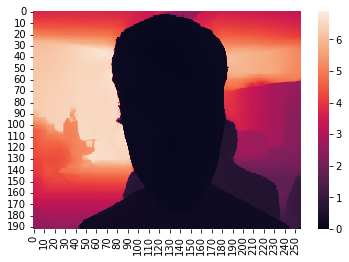

In [129]:
sns.heatmap(pc_array[0])

In [130]:
print(pc_array.shape)
# pc_array.resize((3,128,128))

size_transformer = transforms.Compose([
    transforms.Resize((128,128)),
     transforms.CenterCrop((112, 112))
])   

tensor = torch.from_numpy(pc_array)
tensor = size_transformer(tensor)

pc_arr = tensor.numpy()
print(pc_arr.shape)

(4, 192, 256)
(4, 112, 112)


<AxesSubplot:>

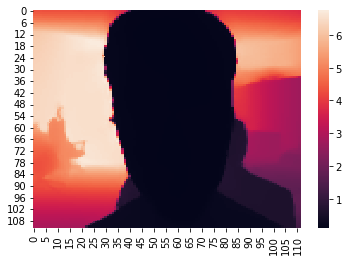

In [134]:
sns.heatmap(pc_arr[0])

In [91]:
print(pc_array.shape)
pc_array = pc_array[:, 8:120, 8:120]
print(pc_array.shape)

(3, 192, 256)
(3, 112, 112)


<AxesSubplot:>

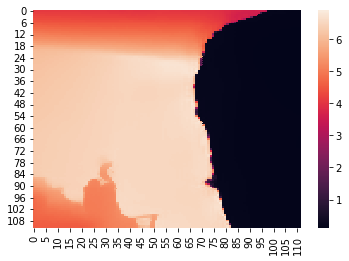

In [92]:
sns.heatmap(pc_array[0])

<AxesSubplot:>

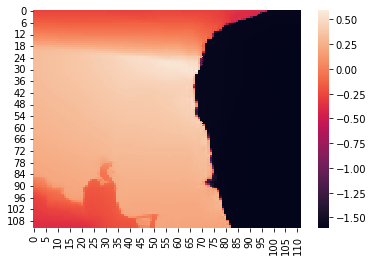

In [93]:
sns.heatmap(pc_array[1])

In [138]:
n = np.zeros((1,122,122))
print(n.dim)

AttributeError: 'numpy.ndarray' object has no attribute 'dim'